In [1]:
# importing stuff..
import numpy as np
import sdeint
import deepdish.io as dd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
from IPython.display import set_matplotlib_formats
from ipywidgets import interact, interactive,FloatSlider,IntSlider,ToggleButton
from ipywidgets import Button, HBox, VBox, Text,Select,Layout,Dropdown
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans"
plt.rcParams['font.serif'] = "cm"

In [2]:
data = dd.load('Beninca_B_min_max_to_Tmax.hdf5')
contvar = data['Tmax']

In [17]:
data = dd.load('Beninca_B_min_max_to_alpha.hdf5')
contvar = data['alpha']

(0.0, 1.0)

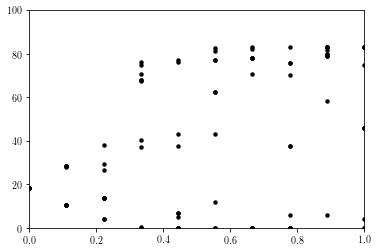

In [20]:
# Quick check of bifurcation
for i,var in enumerate(contvar):
    B = data['B'][i]
    var_arr = var*np.ones_like(B)
    plt.scatter(var_arr,B,s=20,marker="o",c='k', linewidths=0, rasterized=True)
plt.ylim([0,100])
plt.xlim([contvar[0],contvar[-1]])